In [1]:
# Import Modules
import pandas as pd
from pathlib import Path
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline

# Display all of the columns
pd.set_option('display.max_columns', None)

In [3]:
 # Read the CSV file into a Pandas DataFrame
df = pd.read_csv(
    Path('Documents/spaceship_titanic/titanic.csv')
)
df.head()

,HomePlanet,CryoSleep,Deck,RoomNum,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [4]:
 # Split target column from dataset
y = df['Transported']
X = df.drop(columns='Transported')

In [5]:
# Preview the data
X[:5]

,HomePlanet,CryoSleep,Deck,RoomNum,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [6]:
# Print first five entries for target
y[:5]

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [7]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [8]:
# Preview the data
X.head()

,CryoSleep,RoomNum,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,False,1,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [9]:
 # Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
X_train.shape

(5073, 25)

In [11]:
X_test.shape

(1691, 25)

In [12]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
#Implementation of KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
# use cross_val_score function
# create empty list to store neighbors
# create empty list to store scores

from sklearn.model_selection import cross_val_score

neighbors = []
cv_scores = []

# Perform 10-fold cross validation with K=5 for KNN 
# Range of K we want to try
# k = 5 for KNeighborsClassifier

for k in range(1, 101, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
    knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    
    # Passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
    # cv=10 for 10 folds
    # Scoring='accuracy' for evaluation metric
    
scores = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
print(scores)


[0.76070901 0.76070901 0.71196455 0.7267356  0.77366864 0.79881657
 0.81065089 0.80621302 0.77662722 0.77218935]


The optimal score of K neighbors = 43 


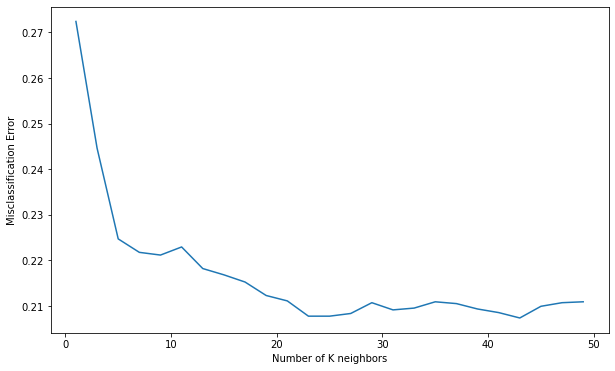

In [46]:
# Misclassification error versus k
MSE = [1-x for x in cv_scores]

# Determining the best k value
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal score of K neighbors = %d " %optimal_k)

# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt 

# Plot misclassification error versus k
plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel("Number of K neighbors")
plt.ylabel("Misclassification Error")
plt.show()

In [47]:
# Instantiate the model
model = KNeighborsClassifier(n_neighbors=43)

In [48]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=43)

In [49]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([False,  True, False, ..., False, False, False])

In [50]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[637, 228],
       [174, 652]], dtype=int64)

In [51]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.79      0.74      0.76       865
        True       0.74      0.79      0.76       826

    accuracy                           0.76      1691
   macro avg       0.76      0.76      0.76      1691
weighted avg       0.76      0.76      0.76      1691

